In [7]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

N=20

In [31]:
df= pd.read_csv('../DATA/Single/stats_2.txt')[1001:]
steps_2 = np.array(df['Env_Steps'], dtype=float)
Ep_len_2 = np.convolve(np.array(df['Avg_EPLM'], dtype=float),np.array([1/N]*N), mode='same')
RW_2 = np.convolve(np.array(df['Avf_RM'], dtype=float),np.array([1/N]*N), mode='same')
    

In [12]:
def get_quantities(i):
    df_0 = pd.read_csv('../DATA/Single/stats_{}.txt'.format(i))
    steps_0 = np.array(df_0['Env_Steps'])
    Ep_len_0 = np.convolve(np.array(df_0['Avg_EPLM'], dtype=float),np.array([1/N]*N), mode='same')
    RW_0 = np.convolve(np.array(df_0['Avf_RM'], dtype=float),np.array([1/N]*N), mode='same')
    
    return steps_0, Ep_len_0, RW_0

In [34]:
steps, ep_len, RW = get_quantities(0)
steps1, ep_len1, RW1= get_quantities(1)

In [12]:
df_0 = pd.read_csv('../DATA/Single/stats_27.txt'.format(0))

steps_0 = np.array(df_0['Env_Steps'])
Ep_len_0 = np.convolve(np.array(df_0['Avg_EPLM'], dtype=float),np.array([1/N]*N), mode='same')
RW_0 = np.convolve(np.array(df_0['Avf_RM'], dtype=float),np.array([1/N]*N), mode='same')
                    
dfs = {i: pd.read_csv('../DATA/Single/stats_{}.txt'.format(i)) for i in range(2,26)}
steps = {key: np.array(dfs[key]['Env_Steps'], dtype=float) for key in dfs}
Ep_len = {key: np.convolve(np.array(dfs[key]['Avg_EPLM'], dtype=float),
                           np.array([1/N]*N), mode='same') for key in dfs}
RW = {key: np.array(dfs[key]['Avf_RM'], dtype=float) for key in dfs}

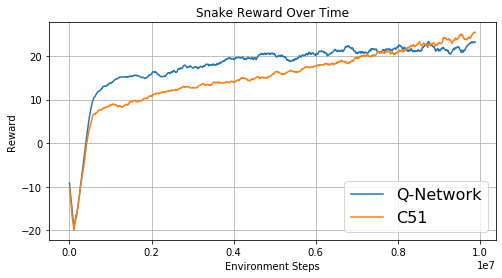

In [36]:
plt.figure(figsize=(8,4))

plt.plot(steps[0:-10], RW[0:-10], label='Q-Network')
plt.plot(steps1[0:-10], RW1[0:-10], label='C51')


plt.xlabel('Environment Steps')
plt.ylabel('Reward')
plt.grid()
plt.legend(fontsize=16)
plt.title('Snake Reward Over Time')
plt.show()